In [0]:
import numpy as np
import pandas as pd
import scipy.optimize
import scipy.stats
import matplotlib.pyplot as plt
from scipy.stats import cumfreq
from scipy.optimize import minimize
from scipy.optimize import Bounds
from collections import Counter

In [0]:
data=pd.read_csv('VAR CVAR new.csv', sep = ';')
data.tail(10)

,Date,Gold,S&P 500,NASDAQ,Copper
1034,05.03.2000,288.6,1399.50,4587.16,0.781
1035,27.02.2000,288.8,1410.75,4442.87,0.791
1036,20.02.2000,293.0,1338.00,4178.58,0.814
1037,13.02.2000,305.2,1353.25,3965.75,0.830
1038,06.02.2000,311.1,1396.75,3968.89,0.843
1039,30.01.2000,310.4,1431.50,3874.37,0.824
1040,23.01.2000,283.0,1366.50,3446.13,0.830
1041,16.01.2000,289.3,1453.75,3849.96,0.867
1042,09.01.2000,283.9,1478.00,3704.74,0.855
1043,02.01.2000,281.9,1460.50,3529.60,0.846


In [0]:
data.head(10)

,Date,Gold,S&P 500,NASDAQ,Copper
0,29.12.2019,1558.7,3235.50,8793.90,2.787
1,22.12.2019,1524.1,3237.50,8770.98,2.829
2,15.12.2019,1486.6,3231.02,8678.49,2.806
3,08.12.2019,1486.9,3172.00,8487.71,2.781
4,01.12.2019,1470.7,3146.00,8397.37,2.725
5,24.11.2019,1478.1,3143.75,8403.68,2.662
6,17.11.2019,1476.2,3111.50,8272.05,2.659
7,10.11.2019,1480.8,3118.25,8315.52,2.651
8,03.11.2019,1475.1,3090.50,8255.89,2.692
9,27.10.2019,1523.7,3063.25,8161.17,2.662


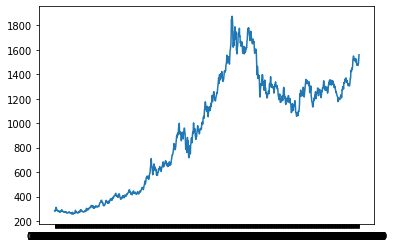

In [0]:
plt.plot(data['Date'][::-1],data['Gold'][::-1])

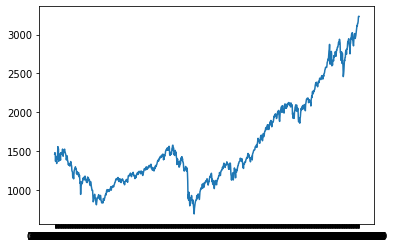

In [0]:
plt.plot(data['Date'][::-1],data['S&P 500'][::-1])

In [0]:
data_change = pd.DataFrame()
data_change['Date'] = data['Date'][:-1]
for asset in data.columns[1:]: # data.columns[1:] - массив, содержащий названия активов. Прохожу в цикле по всем активам.
    new_column = asset + "_change"
    size = data.shape[0] - 1
    data_change[new_column] = [100*(data[asset][i] - data[asset][i + 1]) / data[asset][i + 1] for i in range(0,size,1)]
data_change.head(10)

,Date,Gold_change,S&P 500_change,NASDAQ_change,Copper_change
0,29.12.2019,2.270192,-0.061776,0.261316,-1.484624
1,22.12.2019,2.522535,0.200556,1.065738,0.819672
2,15.12.2019,-0.020176,1.860656,2.247721,0.898957
3,08.12.2019,1.101516,0.826446,1.075813,2.055046
4,01.12.2019,-0.500643,0.071571,-0.075086,2.366642
5,24.11.2019,0.128709,1.036478,1.591262,0.112824
6,17.11.2019,-0.310643,-0.216468,-0.522757,0.301773
7,10.11.2019,0.386414,0.897913,0.722272,-1.523031
8,03.11.2019,-3.189604,0.889578,1.160618,1.126972
9,27.10.2019,0.408567,1.423723,1.643373,-0.819672


In [0]:
data_change.agg(['mean','std'])

,Gold_change,S&P 500_change,NASDAQ_change,Copper_change
mean,0.192489,0.106236,0.149062,0.180158
std,2.382692,2.432328,3.487696,3.606131


In [0]:
data_change.corr()

,Gold_change,S&P 500_change,NASDAQ_change,Copper_change
Gold_change,1.000000,0.004757,-0.000773,0.272916
S&P 500_change,0.004757,1.000000,0.814579,0.375393
NASDAQ_change,-0.000773,0.814579,1.000000,0.277994
Copper_change,0.272916,0.375393,0.277994,1.000000


In [0]:
def Portfolio_change(x, number_of_assets):
    size = data_change.shape[0]
    size_assets = number_of_assets + 1 # т.к. начиная не с нулевого столбца, а с первого
    portfolio_change = [0] * size # заполняю нулями массив изменений портфеля
    for i in range(size): # прохожу по всем дням
        for j in range(1,size_assets): # прохожу по активам
            asset = data_change.columns[j]
            portfolio_change[i] = portfolio_change[i] + (-1) * x[j - 1] * data_change[asset][i] # Это сумма xi * (1 - p_t+1 / p_t)
    return portfolio_change

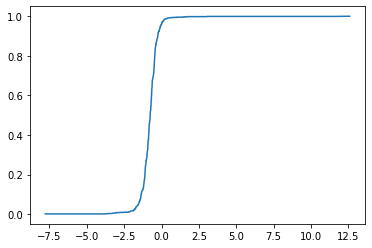

In [0]:
size = len(Portfolio_change([0.25,0.25,0.25,0.25],4))
v = (cumfreq(Portfolio_change([0.25,0.25,0.25,0.25],4), size))[0]
func_empirical = [(v[i])/(size) for i in range(size)]
plt.plot(np.array(sorted(Portfolio_change([0.25,0.25,0.25,0.25],4))),func_empirical)

(array([  1.,   4.,   3.,   1.,   1.,   3.,   4.,   5.,  15.,  17.,  27.,
         49.,  72.,  80.,  91., 114., 115., 103.,  84.,  85.,  39.,  38.,
         25.,  20.,  15.,   9.,   7.,   3.,   4.,   1.,   1.,   1.,   0.,
          1.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([-7.77896937, -7.31598087, -6.85299237, -6.39000388, -5.92701538,
        -5.46402688, -5.00103838, -4.53804988, -4.07506139, -3.61207289,
        -3.14908439, -2.68609589, -2.22310739, -1.7601189 , -1.2971304 ,
        -0.8341419 , -0.3711534 ,  0.0918351 ,  0.55482359,  1.01781209,
         1.48080059,  1.94378909,  2.40677759,  2.86976608,  3.33275458,
         3.79574308,  4.25873158,  4.72172008,  5.18470857,  5.64769707,
         6.11068557,  6.57367407,  7.03666257,  7.49965106,  7.96263956,
         8.42562806,  8.88861656,  9.35160506,  9.81459355, 10.27758205,
        10.74057055, 11.20355905, 11.66654755, 12.12953604, 12.59252454]),
 <a list of 44 Patch objects>)

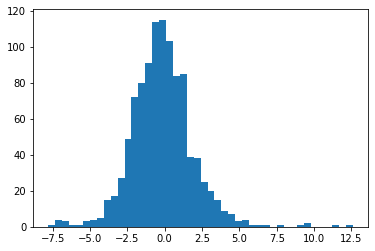

In [0]:
plt.hist(np.array(sorted(Portfolio_change([0.25,0.25,0.25,0.25],4))), bins = 'auto')

In [0]:
def Portfolio_variance(x): # дисперсия портфеля
    number_of_assets = len(x)
    sum = 0
    size = number_of_assets + 1 # т.к. начиная не с нулевого столбца, а с первого
    for i in range(1,size):
        asset = data_change.columns[i]
        sum = sum + (x[i - 1]**2) * ((data_change[asset].std())**2)
        for j in range(i + 1,size):
            asset_next = data_change.columns[j]
            sum = sum + 2 * x[i - 1] * x[j - 1] * data_change.corr()[asset][asset_next] * data_change[asset].std() * data_change[asset_next].std()
    return (sum**(0.5))
print(Portfolio_variance([0.25,0.25,0.25,0.25]))

2.0750370839481933


In [0]:
eq_cons = {'type': 'eq',
           'fun': lambda x: np.array([x[0] + x[1] + x[2] + x[3] - 1.0])
          }

bounds = Bounds(0,1)
x0 = np.array([0.25,0.25,0.25,0.25])
res = minimize(Portfolio_variance, x0, method = 'SLSQP', constraints = [eq_cons], options = {'maxiter': 100}, bounds = bounds)
proportion = [res.x[0],res.x[1],res.x[2],res.x[3]]
print(Portfolio_variance(proportion))
print(res.x)

1.7058402614788655
[5.05984535e-01 4.84072524e-01 8.01767507e-17 9.94294094e-03]


In [0]:
alpha = 0.9 # доверительный уровень
bounds = Bounds(0,1) # условие в виде неравенства
eq_cons = {'type': 'eq',
           'fun': lambda x: np.array([x[0] + x[1] + x[2] + x[3] - 1.0]) # условие в виде равенства
          }
eq_cons2 = {'type': 'eq',
           'fun': lambda x: np.array([x[0] + x[1] - 1.0]) # условие в виде равенства
          }

def CVAR(x,var):
    number_of_assets = len(x)
    size = data_change.shape[0]
    portfolio_change = Portfolio_change(x, number_of_assets)
    portfolio_change = np.array(sorted(portfolio_change))
    min = portfolio_change.min()
    max = portfolio_change.max()
    interval = (max-min)/(size-1)
    x = [(portfolio_change[0]+i*interval) for i in range(size)]
    c = Counter(portfolio_change)
    probability = [c[i] / size for i in portfolio_change]
    k = np.column_stack((x,probability))
    EX = 0
    for i in range(size):
        if (k[i][0] - var) > 0:
            EX = EX + (k[i][0] - var) * probability[i]
    CVAR = var + EX / (1 - alpha)
    return (var + EX / (1 - alpha))
def CVAR1(x):
    return CVAR(x[:(len(x)-1)],x[(len(x)-1)])

In [0]:
x0 = [1,0,0]
res = minimize(CVAR1, x0, method = 'SLSQP', constraints = [eq_cons2], options = {'maxiter': 30,'ftol': 1e-16}, bounds = ((0, 1),(0, 1),(-15, 15)))
print(res,CVAR1(res.x))

     fun: 7.555143737505533
     jac: array([6.22627807e+00, 1.79380480e+01, 2.87634134e-03])
 message: 'Iteration limit exceeded'
    nfev: 225
     nit: 31
    njev: 31
  status: 9
 success: False
       x: array([0.49251175, 0.50748825, 6.72554329]) 7.555143737505533


In [0]:
x0 = [0.25,0.25,0.25,0.25,0]
res = minimize(CVAR1, x0, method = 'SLSQP', constraints = [eq_cons], options = {'maxiter': 30,'ftol': 1e-6}, bounds = ((0, 1),(0, 1),(0, 1),(0, 1),(-15, 15)))
print(res,CVAR1(res.x))

     fun: 7.049763872784316
     jac: array([5.32004917e+00, 8.05773234e+00, 1.07931604e+01, 1.15488694e+01,
       2.87634134e-03])
 message: 'Optimization terminated successfully.'
    nfev: 122
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([6.87177889e-01, 0.00000000e+00, 3.12822111e-01, 1.77939219e-14,
       6.12026641e+00]) 7.049763872784316


In [0]:
for i in range(len(res.x)):
    print('{:0.5f}'.format(res.x[i]), end = '\t')

0.68718	0.00000	0.31282	0.00000	6.11969	

In [0]:
for i in range(len(res.x)):
    print('{:0.5f}'.format(res.x[i]), end = '\t')
print('{:0.5f}'.format(res.fun))
for i in range(len(res.x) - 1):
    print(data.columns[i+1], end = '\t')
print('VaR\tCVaR')

0.68718	0.00000	0.31282	0.00000	6.11969	7.04976
Gold	S&P 500	NASDAQ	Copper	VaR	CVaR


Text(0, 0.5, 'F(ΔS)')

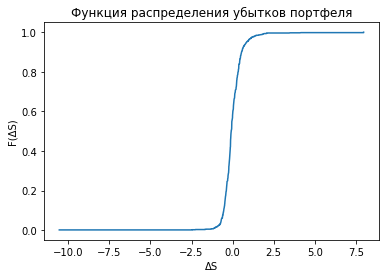

In [0]:
number_of_assets = len(res.x) - 1
portfolio_change = Portfolio_change(res.x[:-1], number_of_assets)
size = len(portfolio_change)
v = (cumfreq(portfolio_change, size))[0]
func_empirical = [(v[i])/(size) for i in range(size)]
plt.plot(np.array(sorted(portfolio_change)),func_empirical)
plt.title("Функция распределения убытков портфеля")
plt.xlabel("ΔS")
plt.ylabel("F(ΔS)")

Text(0, 0.5, 'Частота')

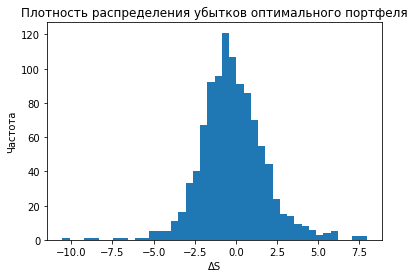

In [0]:
plt.hist(np.array(sorted(portfolio_change)), bins = 'auto')
plt.title("Плотность распределения убытков оптимального портфеля")
plt.xlabel("ΔS")
plt.ylabel("Частота")

Text(0, 0.5, 'Частота')

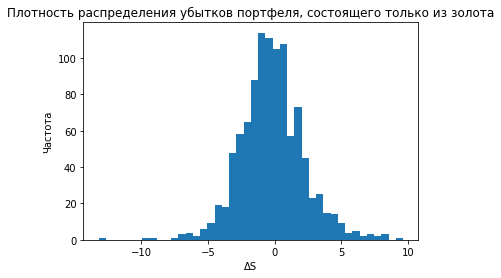

In [0]:
plt.hist(np.array(-data_change['Gold_change'][::-1]), bins = 'auto')
plt.title("Плотность распределения убытков портфеля, состоящего только из золота")
plt.xlabel("ΔS")
plt.ylabel("Частота")

In [0]:
np.quantile(sorted(Portfolio_change([6.87177823e-01, 1.52743371e-10, 3.12822177e-01, 1.30352577e-14],4)), 0.9) # VaR

2.077482361705585

In [0]:
data1=pd.read_csv('VAR_CVAR.csv')
data1.tail(10)

,Date,GOLD,S&P 500,NASDAQ,Aluminum
120,21.05.2019,1290.4,2866.00,7734.49,1837.25
121,20.05.2019,1294.6,2844.00,7647.02,1826.50
122,17.05.2019,1293.0,2862.00,7916.94,1790.50
123,16.05.2019,1303.5,2878.50,7910.59,1777.25
124,15.05.2019,1315.1,2855.00,7943.32,1768.75
125,14.05.2019,1313.6,2839.25,7963.76,1768.00
126,13.05.2019,1319.5,2807.00,8123.29,1788.50
127,10.05.2019,1305.3,2887.00,8164.00,1769.50
128,09.05.2019,1303.2,2872.75,8036.77,1790.50
129,08.05.2019,1299.5,2887.25,8049.64,1791.00


In [0]:
data_change = pd.DataFrame()
data_change['Date'] = data1['Date'][:-1]
for asset in data1.columns[1:]: # data.columns[1:] - массив, содержащий названия активов. Прохожу в цикле по всем активам.
    new_column = asset + "_change"
    size = data1.shape[0] - 1
    data_change[new_column] = [100*(data1[asset][i] - data1[asset][i + 1]) / data1[asset][i + 1] for i in range(0,size,1)]
data_change.head(10)

,Date,GOLD_change,S&P 500_change,NASDAQ_change,Aluminum_change
0,01.11.2019,-0.224452,0.905872,1.134056,1.589554
1,31.10.2019,1.209327,-0.393733,-0.139933,-0.254813
2,30.10.2019,0.402495,0.395289,0.327782,0.241237
3,29.10.2019,-0.340955,-0.016468,-0.590200,1.206377
4,28.10.2019,-0.631103,0.529757,1.005323,0.418229
5,25.10.2019,0.039875,0.532579,0.700237,0.347323
6,24.10.2019,0.601725,-0.049904,0.812952,-0.346121
7,23.10.2019,0.551261,0.375689,0.191133,0.594806
8,22.10.2019,-0.040320,-0.399135,-0.718977,-0.619954
9,21.10.2019,-0.401580,0.610725,0.907963,-0.715717


In [0]:
x0 = [0.25,0.25,0.25,0.25,0]
res = minimize(CVAR1, x0, method = 'SLSQP', constraints = [eq_cons], options = {'maxiter': 30,'ftol': 1e-6}, bounds = ((0, 1),(0, 1),(0, 1),(0, 1),(-15, 15)))
print(res,CVAR1(res.x))

     fun: 0.6556114165167017
     jac: array([-1.41953351,  3.31415189,  0.72614736,  1.00052976, -0.00775194])
 message: 'Optimization terminated successfully.'
    nfev: 212
     nit: 24
    njev: 24
  status: 0
 success: True
       x: array([0.35064681, 0.24278274, 0.19711685, 0.2094536 , 0.50993865]) 0.6556114165167017


In [0]:
np.quantile(sorted(Portfolio_change(res.x,4)), 0.9) # VaR

0.49602888523761

In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.optimize
import scipy.stats
import matplotlib.pyplot as plt
import yfinance as yf
from tkinter import *
from scipy.stats import cumfreq
from scipy.optimize import minimize
from scipy.optimize import Bounds
from collections import Counter

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.figure import Figure
from tkinter import *  
from tkinter import ttk 
sns.set_style('darkgrid')
from matplotlib import cm

In [0]:
cs=cm.Set2(np.arange(40)/7.)
fig = Figure(figsize = (16, 9))
fn = fig.subplots(2, 2)

def Optimal_portf(data_change):
    tickers = tickers_entry.get()
    alpha = float(alpha_entry.get())
    def Portfolio_change(x, number_of_assets):
        size = data_change.shape[0]
        size_assets = number_of_assets + 1 # т.к. начиная не с нулевого столбца, а с первого
        portfolio_change = [0] * size # заполняю нулями массив изменений портфеля
        for i in range(size): # прохожу по всем дням
            for j in range(1,size_assets): # прохожу по активам
                asset = data_change.columns[j - 1]
                portfolio_change[i] = portfolio_change[i] + (-1) * x[j - 1] * data_change[asset][i] # Это сумма xi * (1 - p_t+1 / p_t)
        return portfolio_change
    
    def CVAR(x,var):
        number_of_assets = len(x)
        size = data_change.shape[0]
        portfolio_change = Portfolio_change(x, number_of_assets)
        portfolio_change = np.array(sorted(portfolio_change))
        c = Counter(portfolio_change)
        probability = [c[i] / size for i in portfolio_change]
        EX = 0
        for i in range(size):
            if (portfolio_change[i] - var) > 0:
                EX = EX + (portfolio_change[i] - var) * probability[i]
        CVAR = var + EX / (1 - alpha)
        return (var + EX / (1 - alpha))
    def CVAR1(x):
        return CVAR(x[:(len(x)-1)],x[(len(x)-1)])

    n = len(tickers.split(' ')) # kolvo activov
    x0 = []
    lim = []
    for i in range(n):
        x0.append(1/n)
        lim.append((0, 1))
    lim.append((-15, 15))
    x0.append(0)
    eq_cons = {'type': 'eq',
                'fun': lambda x: np.sum(x[:(len(x)-1)]) - 1.0
               }
    
    res = minimize(CVAR1, x0, method = 'SLSQP', constraints = [eq_cons], options = {'maxiter': 30,'ftol': 1e-6}, bounds = lim)
    
    portfolio_change = (-1) * np.array(Portfolio_change(res.x[:(len(res.x)-1)], len(res.x)-1))
    dynamics = []
    gold_dyn = []
    change = 100
    gold_change = 100
    for i in range(len(portfolio_change)):
        change = change * (1 + portfolio_change[i] / 100)
        dynamics.append(change)
    for i in range(len(data_change['GC=F_change'])):
        gold_change = gold_change * (1 + data_change['GC=F_change'][i] / 100)
        gold_dyn.append(gold_change)
    fn[0, 0].plot(data_change.index, dynamics, color='b', label='На основе CVaR')
    fn[0, 0].legend()
    fn[0, 0].set_title('Относительная динамика доходности портфеля')
    fn[1, 0].hist(np.array(sorted((-1) * portfolio_change)), bins = int(len(portfolio_change)/10), color='b', label='На основе CVaR')
    fn[1, 0].axvline(res.x[len(res.x)-1], color = 'r', label='VaR', ls="--")
    fn[0, 0].legend()
    fn[1, 0].legend()
    fn[1, 0].set_title('Плотность распределения убытков портфеля')
    fn[1, 0].set_xlabel("ΔS - убытки")
    fn[1, 0].set_ylabel("Частота")
    fn[0, 1].set_title('Доли портфеля на основе CVaR')

    fn[0, 1].pie(res.x[:(len(res.x)-1)], labels=tickers.split(' '), autopct='%1.1f%%', colors = cs)
    fn[0, 1].set_title('Доли портфеля на основе CVaR')
    profit = portfolio_change.mean()

    for i in range(len(res.x)):
        text1.insert(END, '{:0.5f}\t'.format(res.x[i]))
    text1.insert(END, '{:0.5f}\t'.format(res.fun))
    text1.insert(END, '{:0.5f}\n'.format(profit))
    for i in range(len(res.x) - 1):
        text1.insert(END, tickers.split(' ')[i] + "\t")
    text1.insert(END, 'VaR\tCVaR\tReturn\n')
    print(int(len(portfolio_change)/40))

def clicked():
    
    tickers = tickers_entry.get()
    alpha = float(alpha_entry.get())
    data = yf.download(tickers, start=start_entry.get(), end=end_entry.get(), interval = int_entry.get())
    data = data.dropna(axis='index', how='any')
    
    data_change = pd.DataFrame()
    for asset in tickers.split(' '): # data.columns[1:] - массив, содержащий названия активов. Прохожу в цикле по всем активам.
        new_column = asset + "_change"
        size = data.shape[0] - 1
        data_change[new_column] = [100*(data['Close'][asset][i + 1] - data['Close'][asset][i]) / data['Close'][asset][i] for i in range(0,size,1)]
    data_change.index = data.index[1:]
    Optimal_portf(data_change)
    

def clicked_variance():
    tickers = tickers_entry.get()
    data = yf.download(tickers, start=start_entry.get(), end=end_entry.get(), interval = int_entry.get())
    data = data.dropna(axis='index', how='any')
    data_change = pd.DataFrame()
    for asset in tickers.split(' '): # data.columns[1:] - массив, содержащий названия активов. Прохожу в цикле по всем активам.
        new_column = asset + "_change"
        size = data.shape[0] - 1
        data_change[new_column] = [100*(data['Close'][asset][i + 1] - data['Close'][asset][i]) / data['Close'][asset][i] for i in range(0,size,1)]
    data_change.index = data.index[1:]
    
    def Portfolio_change(x, number_of_assets):
        size = data_change.shape[0]
        size_assets = number_of_assets + 1 # т.к. начиная не с нулевого столбца, а с первого
        portfolio_change = [0] * size # заполняю нулями массив изменений портфеля
        for i in range(size): # прохожу по всем дням
            for j in range(1,size_assets): # прохожу по активам
                asset = data_change.columns[j - 1]
                portfolio_change[i] = portfolio_change[i] + (-1) * x[j - 1] * data_change[asset][i] # Это сумма xi * (1 - p_t+1 / p_t)
        return portfolio_change
    
    def Portfolio_variance(x): # дисперсия портфеля
        number_of_assets = len(x)
        sum = 0
        size = number_of_assets + 1 # т.к. начиная не с нулевого столбца, а с первого
        for i in range(1,size):
            asset = data_change.columns[i - 1]
            sum = sum + (x[i - 1]**2) * ((data_change[asset].std())**2)
            for j in range(i + 1,size):
                asset_next = data_change.columns[j - 1]
                sum = sum + 2 * x[i - 1] * x[j - 1] * data_change.corr()[asset][asset_next] * data_change[asset].std() * data_change[asset_next].std()
        return (sum**(0.5))
    n = len(tickers.split(' ')) # kolvo activov
    x0 = []
    lim = []
    for i in range(n):
        x0.append(1/n)
        lim.append((0, 1))
    eq_cons = {'type': 'eq',
                'fun': lambda x: np.sum(x[:(len(x))]) - 1.0
               }
    res = minimize(Portfolio_variance, x0, method = 'SLSQP', constraints = [eq_cons], options = {'maxiter': 30,'ftol': 1e-6}, bounds = lim)
    profit = ((-1)*np.array(Portfolio_change(res.x, len(res.x)))).mean()
    portfolio_change = (-1) * np.array(Portfolio_change(res.x[:(len(res.x)-1)], len(res.x)-1))
    dynamics = []
    change = 100
    for i in range(len(portfolio_change)):
        change = change * (1 + portfolio_change[i] / 100)
        dynamics.append(change)
    
    fn[0, 0].plot(data_change.index, dynamics, color='r', label='По Марковицу')
    fn[0, 0].legend()
    fn[1, 1].pie(res.x, labels=tickers.split(' '), autopct='%1.1f%%', colors = cs)
    fn[1, 1].set_title('Доли портфеля по Марковицу')
    
    canvas = FigureCanvasTkAgg(fig, tab2)
    canvas.draw()
    canvas.get_tk_widget().pack()
    for i in range(len(res.x)):
        text2.insert(END, '{:0.5f}\t'.format(res.x[i]))
    text2.insert(END, '{:0.5f}\t'.format(res.fun))
    text2.insert(END, '{:0.5f}\n'.format(profit))
    for i in range(len(res.x)):
        text2.insert(END, tickers.split(' ')[i] + "\t")
    text2.insert(END, 'DX\tReturn\n')
    print(int(len(portfolio_change)/40))


window = Tk()  
window.title("Эффективный инвестиционный портфель на основе меры риска CVaR")  
window.geometry('800x550')

tab_control = ttk.Notebook(window)  
tab1 = ttk.Frame(tab_control)  
tab2 = ttk.Frame(tab_control)  
tab_control.add(tab1, text='Данные')  
tab_control.add(tab2, text='Графики') 

tickers_lbl = Label(tab1, text="Введите символы активов через пробел:",height=1,width=35,anchor=W, justify = LEFT, font="22", padx=10, pady=3)  
tickers_lbl.grid(column=0, row=0)  # позиция текста Привет в окне
tickers_entry = Entry(tab1,width=49, font="20")  
tickers_entry.grid(column=1, row=0)  

alpha_lbl = Label(tab1, text="Введите доверительный уровень:",height=1,width=35,anchor=W, justify = LEFT, font="22", padx=10, pady=3) 
alpha_lbl.grid(column=0, row=1)
alpha_entry = Entry(tab1,width=49, font="20")  
alpha_entry.grid(column=1, row=1)  

int_lbl = Label(tab1, text="Введите таймфрейм (1d, 1wk и т.д.):",height=1,width=35,anchor=W, justify = LEFT, font="22", padx=10, pady=3) 
int_lbl.grid(column=0, row=2)
int_entry = Entry(tab1,width=49, font="20")  
int_entry.grid(column=1, row=2)  

start_lbl = Label(tab1, text="Введите временной период с (гггг-мм-дд):",height=1,width=35,anchor=W, justify = LEFT, font="22", padx=10, pady=3) 
start_lbl.grid(column=0, row=3)
start_entry = Entry(tab1,width=49, font="20")  
start_entry.grid(column=1, row=3) 

end_lbl = Label(tab1, text="По:",height=1,width=35,anchor=W, justify = LEFT, font="22", padx=10, pady=3) 
end_lbl.grid(column=0, row=4)
end_entry = Entry(tab1,width=49, font="20")  
end_entry.grid(column=1, row=4)

btn = Button(tab1, text="Построить оптимальный портфель", command=clicked, anchor = CENTER)  
btn.grid(column = 0, row=5, columnspan = 2, ipadx=10, ipady=6, padx=10, pady=10) 

t_lbl = Label(tab1, text="Доли эффективного портфеля и показатели VaR и CVaR:",height=1,width=80,anchor=CENTER, font="22", padx=10, pady=3) 
t_lbl.grid(column=0, row=6, columnspan = 2)

text1=Text(tab1, height=6, width=80, font="22")
text1.grid(row=7, column=0, columnspan = 2, ipadx=15)

btn2 = Button(tab1, text="Построить оптимальный портфель c минимальной дисперсией", command=clicked_variance, anchor = CENTER)  
btn2.grid(column = 0, row=8, columnspan = 2, ipadx=10, ipady=6, padx=10, pady=10) 

text2=Text(tab1, height=6, width=80, font="22")
text2.grid(row=9, column=0, columnspan = 2, ipadx=15)

canvas = Canvas(tab2)

tab_control.pack(expand=1, fill='both')  
window.mainloop()